In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data= pd.read_csv("gender_submission.csv")
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")
lr = 0.03
#filling all NaN with 0
train_data=train_data.fillna(0)
test_data=test_data.fillna(0)


In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [4]:
print(train_data.shape)
print(train_data.count())

(891, 12)
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64


In [5]:
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

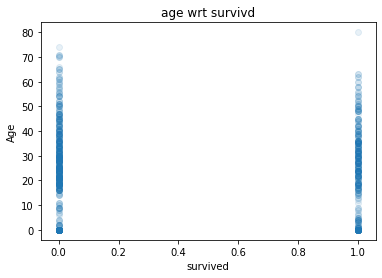

In [6]:
plt.scatter(train_data.Survived,train_data.Age ,alpha=0.1)
plt.title("age wrt survivd")
plt.xlabel("survived")
plt.ylabel("Age")
plt.show()

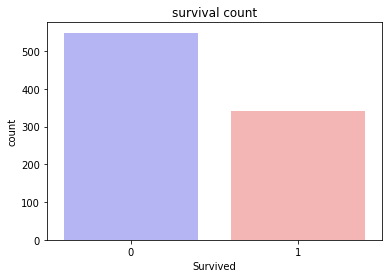

In [7]:
sns.countplot(x="Survived", data=train_data, palette="bwr")
plt.title("survival count")
plt.show()

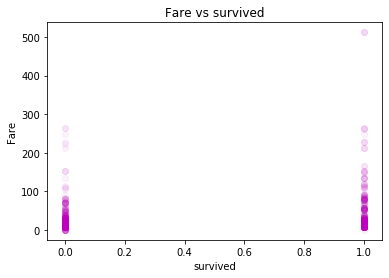

In [8]:
plt.scatter(train_data.Survived,train_data.Fare,alpha=0.05 ,c="m")
plt.title('Fare vs survived')
plt.xlabel('survived')
plt.ylabel('Fare')
plt.show()

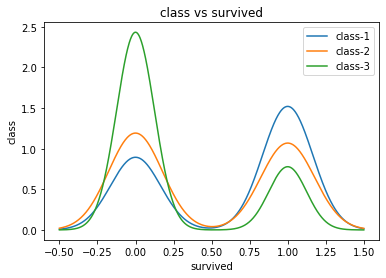

In [9]:
for x in [1,2,3]:
    train_data.Survived[train_data.Pclass==x].plot(kind="kde")
plt.title("class vs survived")
plt.legend(("class-1","class-2","class-3"))
plt.xlabel("survived")
plt.ylabel("class")
plt.show()

Text(0.5, 0, 'survived')

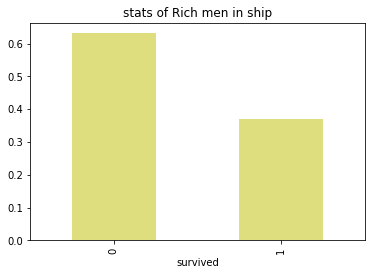

In [10]:
train_data.Survived[(train_data.Pclass==1) & (train_data.Sex=="male")].value_counts(normalize=True).plot(kind="bar",alpha=0.5,color="y")
plt.title("stats of Rich men in ship")
plt.xlabel('survived')

Text(0.5, 0, 'survived')

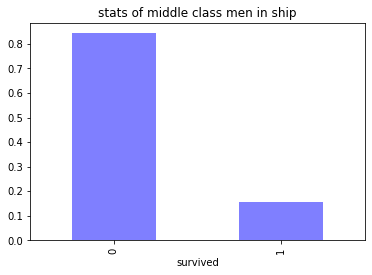

In [11]:
train_data.Survived[(train_data.Pclass==2) & (train_data.Sex=="male")].value_counts(normalize=True).plot(kind="bar",alpha=0.5,color="b")
plt.title("stats of middle class men in ship")
plt.xlabel('survived')

Text(0.5, 0, 'survived')

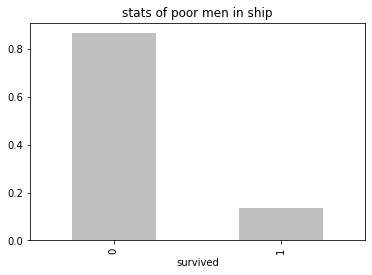

In [12]:
train_data.Survived[(train_data.Pclass==3) & (train_data.Sex=="male")].value_counts(normalize=True).plot(kind="bar",alpha=0.5,color="grey")
plt.title("stats of poor men in ship")
plt.xlabel('survived')

Text(0.5, 0, 'survived')

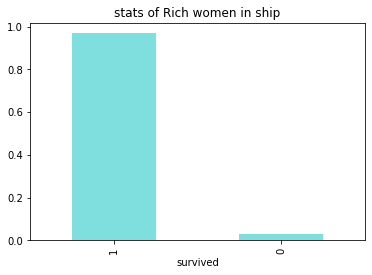

In [13]:
train_data.Survived[(train_data.Pclass==1) & (train_data.Sex=="female")].value_counts(normalize=True).plot(kind="bar",alpha=0.5,color="c")
plt.title("stats of Rich women in ship")
plt.xlabel('survived')

Text(0.5, 0, 'survived')

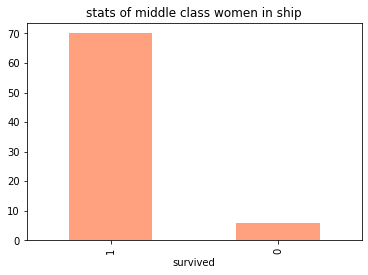

In [14]:
train_data.Survived[(train_data.Pclass==2) & (train_data.Sex=="female")].value_counts().plot(kind="bar",alpha=0.5,color="orangered")
plt.title("stats of middle class women in ship")
plt.xlabel('survived')

Text(0.5, 0, 'survived')

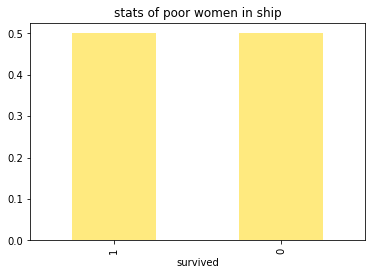

In [15]:
train_data.Survived[(train_data.Pclass==3) & (train_data.Sex=="female")].value_counts(normalize=True).plot(kind="bar",alpha=0.5,color="gold")
plt.title("stats of poor women in ship")
plt.xlabel('survived')

In [16]:
#conclusions for above graphs for every Pclass vs survival for each particular Sex :
train_data.pivot_table("Survived" , index="Sex" , columns="Pclass")

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


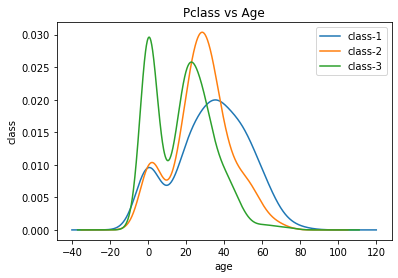

In [35]:
for x in [1,2,3]:
    train_data.Age[train_data.Pclass==x].plot(kind="kde")
plt.title("Pclass vs Age")
plt.legend(("class-1","class-2","class-3"))
plt.xlabel("age")
plt.ylabel("class")
plt.show()

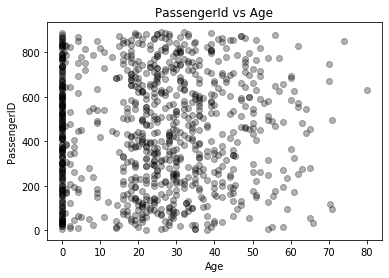

In [18]:
plt.scatter(train_data.Age,train_data.PassengerId,alpha=0.3 ,c="black")
plt.title('PassengerId vs Age')
plt.xlabel('Age')
plt.ylabel('PassengerID')
plt.show()

In [19]:
count_not_survived = len(train_data[train_data.Survived == 0])
count_survived = len(train_data[train_data.Survived == 1])
print("Percentage of People died: {:.2f}%".format((count_not_survived / (len(train_data.Survived))*100)))
print("Percentage of People survived: {:.2f}%".format((count_survived / (len(train_data.Survived))*100)))

Percentage of People died: 61.62%
Percentage of People survived: 38.38%


In [20]:
train_data.shape

(891, 12)

In [21]:
#creating dummy variables
train_data_sex = pd.get_dummies(train_data['Sex'])
train_data_new = pd.concat([train_data, train_data_sex], axis=1)
train_data_new = train_data_new.drop('Sex', axis=1)

train_data_em = pd.get_dummies(train_data_new['Embarked'])
train_data_new = pd.concat([train_data_new, train_data_em], axis=1)
train_data_new = train_data_new.drop('Embarked', axis=1)

train_data_new = train_data_new.drop('Ticket', axis=1)
train_data_new = train_data_new.drop('Name', axis=1)
train_data_new = train_data_new.drop('Cabin', axis=1)
train_data_new = train_data_new.drop('PassengerId',axis=1)

In [22]:
norm = (train_data_new-train_data_new.mean())/(train_data_new.max()-train_data_new.min())#normalised train data 
#including Survived column
features =norm.drop('Survived', axis=1)
targets =train_data_new.iloc[:,0:1]
features

,Pclass,Age,SibSp,Parch,Fare,female,male,0,C,Q,S
0,0.345679,-0.022491,0.059624,-0.063599,-0.048707,-0.352413,0.352413,-0.002245,-0.188552,-0.08642,0.277217
1,-0.654321,0.177509,0.059624,-0.063599,0.076277,0.647587,-0.647587,-0.002245,0.811448,-0.08642,-0.722783
2,0.345679,0.027509,-0.065376,-0.063599,-0.047390,0.647587,-0.647587,-0.002245,-0.188552,-0.08642,0.277217
3,-0.654321,0.140009,0.059624,-0.063599,0.040786,0.647587,-0.647587,-0.002245,-0.188552,-0.08642,0.277217
4,0.345679,0.140009,-0.065376,-0.063599,-0.047146,-0.352413,0.352413,-0.002245,-0.188552,-0.08642,0.277217
...,...,...,...,...,...,...,...,...,...,...,...
886,-0.154321,0.040009,-0.065376,-0.063599,-0.037484,-0.352413,0.352413,-0.002245,-0.188552,-0.08642,0.277217
887,-0.654321,-0.059991,-0.065376,-0.063599,-0.004302,0.647587,-0.647587,-0.002245,-0.188552,-0.08642,0.277217
888,0.345679,-0.297491,0.059624,0.269734,-0.017087,0.647587,-0.647587,-0.002245,-0.188552,-0.08642,0.277217
889,-0.654321,0.027509,-0.065376,-0.063599,-0.004302,-0.352413,0.352413,-0.002245,0.811448,-0.08642,-0.722783


In [23]:
features=np.array(features)
targets=np.array(targets)
print(features.shape,targets.shape)

(891, 11) (891, 1)


In [24]:
weights = np.zeros([11,1])
weights.shape

(11, 1)

In [25]:
def predict(features, weights):
    z = np.dot(features, weights)
    predictions=1/(1+np.exp(-z))
    return predictions

In [26]:
features[:5]

array([[ 0.34567901, -0.02249116,  0.05962402, -0.06359895, -0.04870737,
        -0.35241302,  0.35241302, -0.00224467, -0.18855219, -0.08641975,
         0.27721661],
       [-0.65432099,  0.17750884,  0.05962402, -0.06359895,  0.07627731,
         0.64758698, -0.64758698, -0.00224467,  0.81144781, -0.08641975,
        -0.72278339],
       [ 0.34567901,  0.02750884, -0.06537598, -0.06359895, -0.04738986,
         0.64758698, -0.64758698, -0.00224467, -0.18855219, -0.08641975,
         0.27721661],
       [-0.65432099,  0.14000884,  0.05962402, -0.06359895,  0.04078587,
         0.64758698, -0.64758698, -0.00224467, -0.18855219, -0.08641975,
         0.27721661],
       [ 0.34567901,  0.14000884, -0.06537598, -0.06359895, -0.04714587,
        -0.35241302,  0.35241302, -0.00224467, -0.18855219, -0.08641975,
         0.27721661]])

In [27]:
weights[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [28]:
predict(features, weights)[:5]

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]])

In [29]:
# loss=cost (h(x),y)=-y(log(h(x)))-(1-y)log(1-h(x));y=targets(0 or 1);h(x)=predictions(0 to 1)
#J(theta)=-loss/m;N=no.of training examples=m;J(theta) for logistic regression=mse for linear regression
def loss_function(features, targets, weights):
    N = len(targets)#891
    predictions = predict(features, weights)
    loss = targets*np.log(predictions)+(1-targets)*np.log(1-predictions)
    mse=(-1/N)*loss.sum()
    return mse

In [30]:
features.shape

(891, 11)

In [31]:
#features.T -->x(i)
#(11,891)*(891,1)---->(11,1)--->thetas
def update_weights(features, targets, weights, lr):
    N = len(features)
    predictions = predict(features, weights)
    gradient = np.dot(features.T,  predictions - targets)
    gradient /= N
    gradient *= lr
    weights -= gradient
    
    return weights

In [32]:
def train(features,targets, weights, lr, iters=10000):
    cost_history = []

    for i in range(10000):
        weights = update_weights(features,targets, weights, lr)
        cost = loss_function(features,targets, weights)
        cost_history.append(cost)    
    return cost_history,weights

In [33]:
mse,weights=train(features,targets, weights, lr, iters=10000)

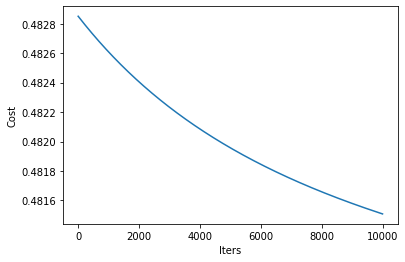

In [34]:
cost_history=[]
for i in range(10000):
        weights = update_weights(features,targets, weights, lr)
        cost = loss_function(features,targets, weights)
        cost_history.append(cost)
        
arr =[]
for i in range(1,10001):
    arr.append(i)
plt.plot(arr,cost_history)
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()